In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

local_zip = '/content/drive/MyDrive/Colab Notebooks/Data/99505_234911_bundle_archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
import seaborn as sns
import numpy as np



List of labels 
 
 
['fear', 'happy', 'sad', 'disgust', 'angry', 'surprise', 'neutral']


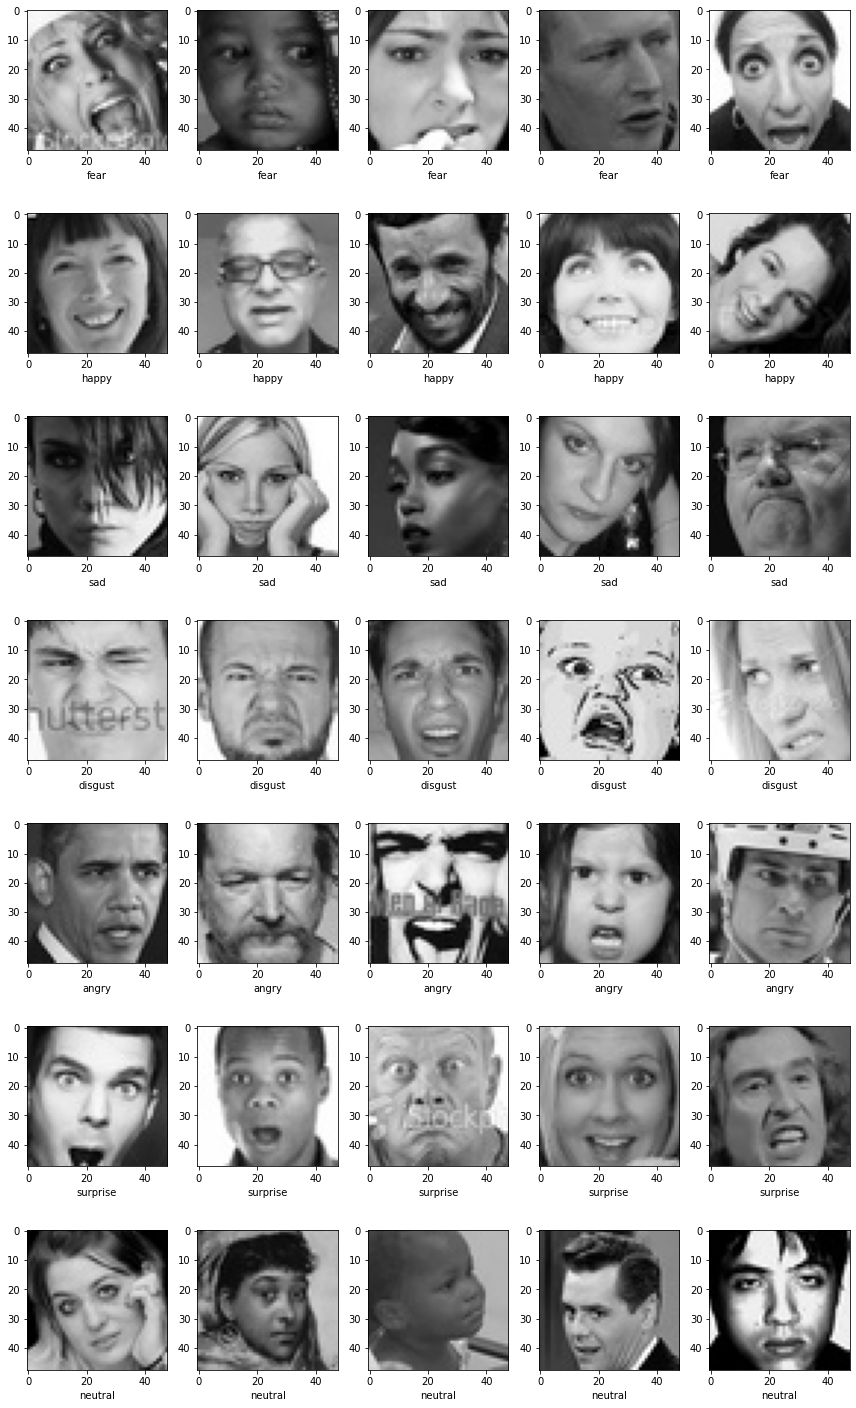

In [ ]:
base_path = "/tmp/images/images/"

train_path = base_path+ "train"
validation_path = base_path +"validation"



print("List of labels \n \n ")
print(os.listdir(train_path))

j =0 
plt.figure(0,figsize = (12,20))
for expression in os.listdir(train_path) :
    for i in range(1,6) :
        j = j+1
        plt.subplot(7,5,j) 
        img = load_img(train_path+'/'+expression+'/'+os.listdir(train_path+'/'+expression)[i],
                      target_size = (48,48))
        plt.imshow(img)
        plt.xlabel(expression)

plt.tight_layout()
plt.show()


In [ ]:
for expression in os.listdir(train_path):
    print(expression + "  images are   "+ str(len(os.listdir(train_path+'/'+expression))))

fear  images are   4103
happy  images are   7164
sad  images are   4938
disgust  images are   436
angry  images are   3993
surprise  images are   3205
neutral  images are   4982


In [ ]:

train_datagen = ImageDataGenerator()
validation_datagen =ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_path ,
                                                    target_size = (48,48),
                                                    batch_size = 64,
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    color_mode = "grayscale"
                                                    )
validation_generator = validation_datagen.flow_from_directory(validation_path ,
                                                    target_size = (48,48),
                                                    batch_size = 64,
                                                    class_mode = 'categorical',
                                                    shuffle = False,
                                                    color_mode = "grayscale"
                                                    )


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization,Flatten
from tensorflow.keras.models import Sequential,Model

model = Sequential([
    Conv2D(512,(3,3), input_shape =(48,48,1),activation = 'relu',padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    BatchNormalization(),
    
    
    Conv2D(512 ,(3,3),activation = 'relu',padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    BatchNormalization(),
   
    Conv2D(2048,(3,3),activation = 'relu',padding = 'same'),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    
    Conv2D(512,(3,3),activation = 'relu',padding = 'same'),
    
    MaxPooling2D(2,2),
    Dropout(0.2),
    BatchNormalization(),
    
    Flatten(),
    Dense(512,activation = 'relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(512,activation = 'relu'),
    
    Dropout(0.2),
    BatchNormalization(),
    Dense(7,activation = "softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 512)       5120      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 512)       0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 512)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 512)       2048      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 512)       2359808   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 512)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 512)       0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# number of epochs to train the NN
epochs = 50

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
check1 = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)
callbacks_list = [checkpoint,check1]

history = model.fit(train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50
450/450 [==============================] - 86s 170ms/step - loss: 2.0808 - accuracy: 0.2493 - val_loss: 1.4880 - val_accuracy: 0.4288

Epoch 00001: val_accuracy improved from -inf to 0.42884, saving model to model_weights.h5
Epoch 2/50
450/450 [==============================] - 79s 175ms/step - loss: 1.5063 - accuracy: 0.4232 - val_loss: 1.5103 - val_accuracy: 0.4257

Epoch 00002: val_accuracy did not improve from 0.42884
Epoch 3/50
450/450 [==============================] - 78s 174ms/step - loss: 1.2802 - accuracy: 0.5123 - val_loss: 1.3562 - val_accuracy: 0.4820

Epoch 00003: val_accuracy improved from 0.42884 to 0.48196, saving model to model_weights.h5
Epoch 4/50
450/450 [==============================] - 78s 174ms/step - loss: 1.1492 - accuracy: 0.5594 - val_loss: 1.3039 - val_accuracy: 0.4928

Epoch 00004: val_accuracy improved from 0.48196 to 0.49276, saving model to model_weights.h5
Epoch 5/50
450/450 [==============================] - 78s 174ms/step - loss: 1.0535 -

In [ ]:
# serialize model structure to JSON

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

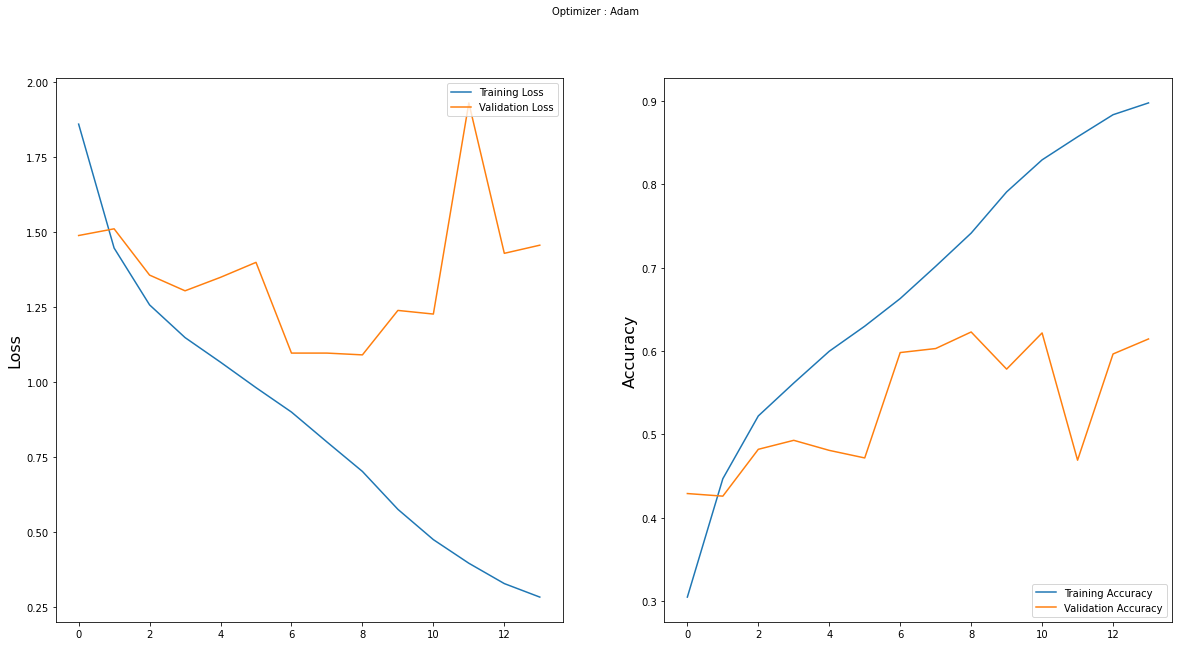

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

<Figure size 432x288 with 0 Axes>

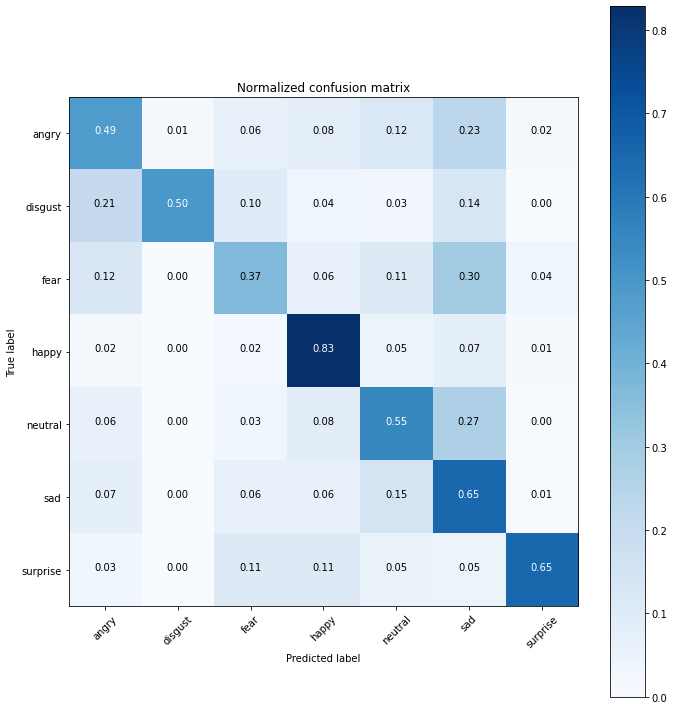

In [ ]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [ ]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  

Saving download.jpg to download.jpg


In [ ]:
class_names = list(validation_generator.class_indices.keys())
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

happy


3

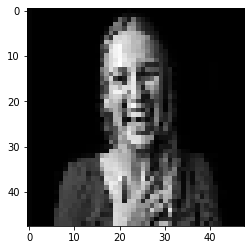

In [ ]:
import numpy as np
from keras.preprocessing import image

img_width, img_height = 48, 48
img = image.load_img(path, target_size = (img_width, img_height),color_mode="grayscale")
plt.imshow(img,cmap = "gray")
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
classes = model.predict(img)
predicted = np.argmax(classes)
print(class_names[predicted])
predicted